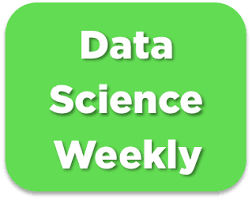

# Challenge : predict conversions 🏆🏆

This is the template that shows the different steps of the challenge. In this notebook, all the training/predictions steps are implemented for a very basic model (logistic regression with only one variable). Please use this template and feel free to change the preprocessing/training steps to get the model with the best f1-score ! May the force be with you 🧨🧨  

**For a detailed description of this project, please refer to *02-Conversion_rate_challenge.ipynb*.**

# Import data and libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

# Read file with labels

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Jedha_Fullstack/Machine_Learning_Projects/Conversion_Rate_Challenge/Conversion_Data_Train.csv')
print('Set with labels (our train+test) :', df.shape)

Set with labels (our train+test) : (284580, 6)


In [4]:
df

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0
...,...,...,...,...,...,...
284575,US,36,1,Ads,1,0
284576,US,31,1,Seo,2,0
284577,US,41,1,Seo,5,0
284578,US,31,1,Direct,4,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284580 entries, 0 to 284579
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              284580 non-null  object
 1   age                  284580 non-null  int64 
 2   new_user             284580 non-null  int64 
 3   source               284580 non-null  object
 4   total_pages_visited  284580 non-null  int64 
 5   converted            284580 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 13.0+ MB


In [6]:
df.describe(include="all")

,country,age,new_user,source,total_pages_visited,converted
count,284580,284580.000000,284580.000000,284580,284580.000000,284580.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,160124,NaN,NaN,139477,NaN,NaN
mean,NaN,30.564203,0.685452,NaN,4.873252,0.032258
std,NaN,8.266789,0.464336,NaN,3.341995,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


In [7]:
# Suppression of an outlier
mask = df["age"] < 100
df = df.loc[mask,:]
df.describe(include="all")

,country,age,new_user,source,total_pages_visited,converted
count,284578,284578.000000,284578.000000,284578,284578.000000,284578.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,160124,NaN,NaN,139476,NaN,NaN
mean,NaN,30.563596,0.685457,NaN,4.873198,0.032251
std,NaN,8.263627,0.464334,NaN,3.341939,0.176667
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


# Explore dataset

In [8]:
# The dataset is quite big : you must create a sample of the dataset before making any visualizations !
cat_variables = ['country', 'new_user', 'source']
cat_freqs = df[cat_variables].value_counts(normalize=True)
cat_freqs.sort_index(level='country')

country  new_user  source
China    0         Ads       0.020764
                   Direct    0.016737
                   Seo       0.035579
         1         Ads       0.047825
                   Direct    0.038517
                   Seo       0.083471
Germany  0         Ads       0.003848
                   Direct    0.002815
                   Seo       0.006564
         1         Ads       0.008026
                   Direct    0.006188
                   Seo       0.013645
UK       0         Ads       0.013613
                   Direct    0.011108
                   Seo       0.024570
         1         Ads       0.029148
                   Direct    0.024106
                   Seo       0.050805
US       0         Ads       0.049955
                   Direct    0.041110
                   Seo       0.087881
         1         Ads       0.108030
                   Direct    0.088095
                   Seo       0.187601
dtype: float64

In [9]:
df_merged = df.merge(cat_freqs.rename('weights'), left_on=cat_variables, right_index=True, how='left')
df_merged

,country,age,new_user,source,total_pages_visited,converted,weights
0,China,22,1,Direct,2,0,0.038517
1,UK,21,1,Ads,3,0,0.029148
2,Germany,20,0,Seo,14,1,0.006564
3,US,23,1,Seo,3,0,0.187601
4,US,28,1,Direct,3,0,0.088095
...,...,...,...,...,...,...,...
284575,US,36,1,Ads,1,0,0.108030
284576,US,31,1,Seo,2,0,0.187601
284577,US,41,1,Seo,5,0,0.187601
284578,US,31,1,Direct,4,0,0.088095


In [10]:
sample_size = int(len(df) * 0.33)
df_sample = df_merged.sample(n=sample_size, weights='weights')

In [11]:
df_sample.describe(include='all')

,country,age,new_user,source,total_pages_visited,converted,weights
count,93910,93910.000000,93910.000000,93910,93910.000000,93910.000000,93910.000000
unique,4,NaN,NaN,3,NaN,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN,NaN
freq,70685,NaN,NaN,57294,NaN,NaN,NaN
mean,NaN,30.616995,0.798073,NaN,4.829049,0.026781,0.115311
std,NaN,8.298547,0.401440,NaN,3.260889,0.161444,0.057975
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000,0.002815
25%,NaN,24.000000,1.000000,NaN,2.000000,0.000000,0.083471
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000,0.088095
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000,0.187601


In [12]:
num_features = ['age', 'total_pages_visited']
for feature in num_features:
    fig = px.histogram(df_sample, feature, color = 'converted', facet_row = 'converted', histnorm = 'probability')
    fig.show()

The visualization of quantitative variables informs us that evidently the age of individuals is a data point of little significance in the conversion or non-conversion, while the number of visited pages is, on the contrary, meaningful.

In [13]:
cat_features = ['source', 'country', 'new_user']

for feature in cat_features:
    cat_counts = df_sample.groupby(feature)['converted'].value_counts(normalize=True)
    cat_counts = cat_counts.rename("target")
    cat_counts = pd.DataFrame(cat_counts).reset_index()
    cat_counts.columns = [feature, 'converted_ratio', 'count']
    cat_counts = cat_counts.loc[cat_counts['converted_ratio']==1]

    fig = px.bar(x=cat_counts[feature], y=cat_counts['count']*100)
    fig.update_layout(yaxis_title='conversion_prct')
    fig.update_layout(xaxis_title=feature)
    fig.show()

Regarding categorical variables, we observe that the country of origin of the individual has a striking impact on the conversion or non-conversion, being a new user or not also appears to be significant, while the source seems to be much less important.

In [14]:


corr_matrix = df.loc[:,['age', 'total_pages_visited', 'converted']].corr().round(2)

import plotly.figure_factory as ff

fig = ff.create_annotated_heatmap(corr_matrix.values,
                                  x = corr_matrix.columns.tolist(),
                                  y = corr_matrix.index.tolist())


fig.show()

# Make your model

## Choose variables to use in the model, and create train and test sets
**From the EDA, we know that the most useful feature is total_pages_visited. Let's create a baseline model by using at first only this feature : in the next cells, we'll make preprocessings and train a simple (univariate) logistic regression.**

In [15]:
features_list = ['total_pages_visited', "country", "new_user", "age", "source"]
numeric_indices = [0, 3]
categorical_indices = [1, 2, 4]
target_variable = 'converted'

In [16]:
X = df.loc[:, features_list]
Y = df.loc[:, target_variable]

print('Explanatory variables : ', X.columns, "\n")

Explanatory variables :  Index(['total_pages_visited', 'country', 'new_user', 'age', 'source'], dtype='object') 



In [17]:
# Divide dataset Train set & Test set
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)
print("...Done.")

Dividing into train and test sets...
...Done.


In [18]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values
print("...Done")

print(X_train[0:5,:])
print(X_test[0:2,:], "\n")
print(Y_train[0:5])
print(Y_test[0:2])

Convert pandas DataFrames to numpy arrays...
...Done
[[5 'US' 0 23 'Direct']
 [4 'US' 1 26 'Ads']
 [2 'Germany' 1 39 'Ads']
 [8 'US' 1 39 'Seo']
 [2 'US' 1 44 'Seo']]
[[1 'UK' 1 34 'Ads']
 [5 'UK' 0 32 'Ads']] 

[0 0 0 0 0]
[0 0]


In [19]:
# Pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    ])

In [20]:
# Pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first'))
    ])

In [21]:
# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_indices),
        ('cat', categorical_transformer, categorical_indices)
    ])

## Training pipeline

In [22]:
# Put here all the preprocessings
print("Encoding categorical features and standardizing numerical features...")

X_train = preprocessor.fit_transform(X_train)
print("...Done \n")
print(X_train[0:5,:])

X_test = preprocessor.transform(X_test)
print("...Done \n")
print(X_test[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done 

[[ 0.0376251  -0.91614386  0.          0.          1.          0.
   1.          0.        ]
 [-0.2616379  -0.55333446  0.          0.          1.          1.
   0.          0.        ]
 [-0.86016391  1.01883962  1.          0.          0.          1.
   0.          0.        ]
 [ 0.9354141   1.01883962  0.          0.          1.          1.
   0.          1.        ]
 [-0.86016391  1.62352196  0.          0.          1.          1.
   0.          1.        ]]
...Done 

[[-1.15942691  0.41415728  0.          1.          0.          1.
   0.          0.        ]
 [ 0.0376251   0.17228435  0.          1.          0.          0.
   0.          0.        ]
 [-1.15942691  1.62352196  0.          0.          1.          1.
   0.          0.        ]
 [-1.15942691  0.53509375  0.          0.          1.          1.
   1.          0.        ]
 [-0.56090091 -0.19052506  0.          0.          1.          1.
   1. 

In [23]:
# Model tuning #1
%%time

logreg = LogisticRegression()

params = {'C': [2, 10, 50, 100]}

logreg_grid = GridSearchCV(logreg, param_grid = params, cv = 5, scoring = 'f1')
logreg_grid.fit(X_train, Y_train)
print("Best hyperparameters : ", logreg_grid.best_params_)
print("Best F1_score : ", logreg_grid.best_score_)
gridsearch_scores = pd.DataFrame(logreg_grid.cv_results_)
gridsearch_scores.loc[:,['params', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values("rank_test_score")

Best hyperparameters :  {'C': 10}
Best F1_score :  0.7632488818866289
CPU times: user 11.8 s, sys: 6.9 s, total: 18.7 s
Wall time: 12.4 s


,params,mean_test_score,std_test_score,rank_test_score
1,{'C': 10},0.763249,0.010413,1
2,{'C': 50},0.763249,0.010413,1
3,{'C': 100},0.763249,0.010413,1
0,{'C': 2},0.763215,0.010355,4


In [24]:
# Performance assessment on test set
best_logreg = LogisticRegression(C=10)
best_logreg.fit(X_train, Y_train)
y_test_pred = best_logreg.predict(X_test)
f1_score(Y_test, y_test_pred)

0.7641594246329039

In [25]:
# Model tuning #2
%%time

dtree = DecisionTreeClassifier()

params = {
    'max_depth': [5, 8, 11],
    'min_samples_leaf': [4, 7, 10],
    'min_samples_split': [2, 3, 4]
    }

dtree_grid = GridSearchCV(dtree, param_grid = params, cv = 5)
dtree_grid.fit(X_train, Y_train)
print("Best hyperparameters : ", dtree_grid.best_params_)
print("Best F1_score : ", dtree_grid.best_score_)
gridsearch_scores = pd.DataFrame(dtree_grid.cv_results_)
gridsearch_scores.loc[:,['params', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values("rank_test_score")

Best hyperparameters :  {'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 3}
Best F1_score :  0.9854345463158507
CPU times: user 34.6 s, sys: 45.9 ms, total: 34.6 s
Wall time: 36 s


,params,mean_test_score,std_test_score,rank_test_score
17,"{'max_depth': 8, 'min_samples_leaf': 10, 'min_...",0.985435,0.000508,1
16,"{'max_depth': 8, 'min_samples_leaf': 10, 'min_...",0.985435,0.000508,1
15,"{'max_depth': 8, 'min_samples_leaf': 10, 'min_...",0.985430,0.000510,3
13,"{'max_depth': 8, 'min_samples_leaf': 7, 'min_s...",0.985408,0.000481,4
14,"{'max_depth': 8, 'min_samples_leaf': 7, 'min_s...",0.985408,0.000481,4
12,"{'max_depth': 8, 'min_samples_leaf': 7, 'min_s...",0.985408,0.000481,4
24,"{'max_depth': 11, 'min_samples_leaf': 10, 'min...",0.985391,0.000537,7
25,"{'max_depth': 11, 'min_samples_leaf': 10, 'min...",0.985391,0.000537,7
26,"{'max_depth': 11, 'min_samples_leaf': 10, 'min...",0.985391,0.000537,7
9,"{'max_depth': 8, 'min_samples_leaf': 4, 'min_s...",0.985364,0.000412,10


In [26]:
# Performance assessment on test set
best_dtree = DecisionTreeClassifier(max_depth=7, min_samples_leaf=16, min_samples_split=10)
best_dtree.fit(X_train, Y_train)
y_test_pred = best_dtree.predict(X_test)
f1_score(Y_test, y_test_pred)

0.7473372781065089

In [27]:
print(logreg_grid.best_params_)
print(dtree_grid.best_params_)

{'C': 10}
{'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 3}


In [28]:
# Model tuning #3
%%time

voting_classifier = VotingClassifier(estimators=[
    ("logistic", LogisticRegression(C=50)),
    ("tree", DecisionTreeClassifier(max_depth=8, min_samples_leaf=10, min_samples_split=2))
], voting='soft')

voting_classifier.fit(X_train, Y_train)

y_train_pred = voting_classifier.predict(X_train)
print("Score F1 sur les données d'entraînement :", f1_score(Y_train, y_train_pred))

y_test_pred = voting_classifier.predict(X_test)
print("Score F1 sur les données de test :", f1_score(Y_test, y_test_pred))

Score F1 sur les données d'entraînement : 0.7674998112210225
Score F1 sur les données de test : 0.7551020408163266
CPU times: user 1.49 s, sys: 455 ms, total: 1.95 s
Wall time: 1.85 s


## Best classifier performance assessment

In [29]:
# Train model
print("Train model...")
best_classifier = LogisticRegression (C=10)
best_classifier.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [30]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = best_classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



In [31]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = best_classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



## F1-scores

In [32]:
# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard

print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

f1-score on train set :  0.7637296318648159
f1-score on test set :  0.7641594246329039


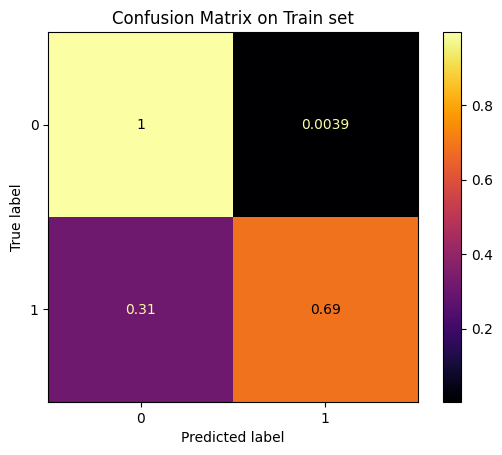

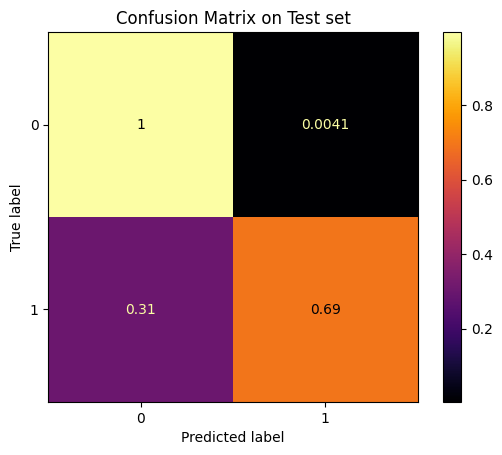

In [33]:
# Confusion matrix and coefs observation
_ , ax = plt.subplots()
ax.set(title="Confusion Matrix on Train set")
ConfusionMatrixDisplay.from_estimator(best_classifier, X_train, Y_train, ax=ax, normalize='true', cmap='inferno')
plt.show()

_ , ax = plt.subplots()
ax.set(title="Confusion Matrix on Test set")
ConfusionMatrixDisplay.from_estimator(best_classifier, X_test, Y_test, ax=ax, normalize='true', cmap='inferno')
plt.show()

In [34]:
individual_models = voting_classifier.named_estimators_.values()

for model in individual_models:
    if hasattr(model, 'coef_'):
        feature_names = features_list
        coefficients = model.coef_[0]
        print("Coefficients des variables explicatives pour le modèle", model)
        for feature, coefficient in zip(feature_names, coefficients):
            print(feature, ":", coefficient)
        print()
    else:
        feature_names = features_list
        importances = model.feature_importances_
        print("Coefficients des variables explicatives pour le modèle", model)
        for feature, importance in zip(feature_names, importances):
            print(feature, ":", importance)
        print()

Coefficients des variables explicatives pour le modèle LogisticRegression(C=50)
total_pages_visited : 2.5444765832506797
country : -0.6130218300148484
new_user : 3.8020704974495443
age : 3.637683998923937
source : 3.2891343128356847

Coefficients des variables explicatives pour le modèle DecisionTreeClassifier(max_depth=8, min_samples_leaf=10)
total_pages_visited : 0.878871390862157
country : 0.0299080022928098
new_user : 0.0074087597344927895
age : 0.008902851751268539
source : 0.012016399278625498



In [35]:
feature_names

['total_pages_visited', 'country', 'new_user', 'age', 'source']

In [36]:
coefficients = best_classifier.coef_[0]
features_names = preprocessor.get_feature_names_out(input_features=features_list)
df_coefficients = pd.DataFrame({'Variable': features_names, 'Coefficient': coefficients})
df_coefficients

,Variable,Coefficient
0,num__total_pages_visited,2.544019
1,num__age,-0.612910
2,cat__country_Germany,3.784065
3,cat__country_UK,3.620978
4,cat__country_US,3.272809
5,cat__new_user_1,-1.711856
6,cat__source_Direct,-0.219647
7,cat__source_Seo,-0.048619


**Our baseline model reaches a f1-score of almost 70%. Now, feel free to refine your model and try to beat this score ! 🚀🚀**

# Train best classifier on all data and use it to make predictions on X_without_labels
**Before making predictions on the file conversion_data_test.csv, let's train our model on ALL the data that was in conversion_data_train.csv. Sometimes, this allows to make tiny improvements in the score because we're using more examples to train the model.**

In [37]:
# Concatenate our train and test set to train your best classifier on all data with labels
X = np.append(X_train,X_test,axis=0)
Y = np.append(Y_train,Y_test)

best_classifier.fit(X,Y)

LogisticRegression(C=10)

In [38]:
# Read data without labels
data_without_labels = pd.read_csv('/content/drive/MyDrive/Jedha_Fullstack/Machine_Learning_Projects/Conversion_Rate_Challenge/Conversion_Data_Test.csv')
print('Prediction set (without labels) :', data_without_labels.shape)

# Warning : check consistency of features_list (must be the same than the features
# used by your best classifier)
features_list = ['total_pages_visited', "country", "new_user", "age", "source"]
X_without_labels = data_without_labels.loc[:, features_list]

# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_without_labels = X_without_labels.values
print("...Done")

#print(X_without_labels[0:5,:])
print(X_without_labels[0:5,:])

Prediction set (without labels) : (31620, 5)
Convert pandas DataFrames to numpy arrays...
...Done
[[16 'UK' 0 28 'Seo']
 [5 'UK' 1 22 'Direct']
 [1 'China' 1 32 'Seo']
 [6 'US' 1 32 'Ads']
 [3 'China' 0 25 'Seo']]


In [39]:
# WARNING : PUT HERE THE SAME PREPROCESSING AS FOR YOUR TEST SET
# CHECK YOU ARE USING X_without_labels
print("Encoding categorical features and standardizing numerical features...")

X_without_labels = preprocessor.transform(X_without_labels)
print("...Done")
print(X_without_labels[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[ 3.32951812 -0.31146152  0.          1.          0.          0.
   0.          1.        ]
 [ 0.0376251  -1.03708033  0.          1.          0.          1.
   1.          0.        ]
 [-1.15942691  0.17228435  0.          0.          0.          1.
   0.          1.        ]
 [ 0.3368881   0.17228435  0.          0.          1.          1.
   0.          0.        ]
 [-0.56090091 -0.67427093  0.          0.          0.          0.
   0.          1.        ]]


In [40]:
# Make predictions and dump to file
# WARNING : MAKE SURE THE FILE IS A CSV WITH ONE COLUMN NAMED 'converted' AND NO INDEX !
# WARNING : FILE NAME MUST HAVE FORMAT 'conversion_data_test_predictions_[name].csv'
# where [name] is the name of your team/model separated by a '-'
# For example : [name] = AURELIE-model1
data = {
    'converted': best_classifier.predict(X_without_labels)
}

Y_predictions = pd.DataFrame(columns=['converted'],data=data)
Y_predictions.to_csv('conversion_data_test_predictions_Francois-model5.csv', index=False)

## Analyzing the coefficients and interpreting the result
**In this template, we just trained a model with only one feature (total_pages_visited), so there's no analysis to be done about the feature importance 🤔**

**Once you've included more features in your model, please take some time to analyze the model's parameters and try to find some lever for action to improve the newsletter's conversion rate 😎😎**

The analysis of coefficients from our most performant model provides several insights into user conversion or non-conversion and allows us to propose some recommendations. The first striking element is the significant difference in conversion rates based on the country of origin. The conversion rate is much lower for Chinese users compared to Western users (UK, US, Germany), suggesting that it might be worth understanding the reasons behind this difference in conversion rates and exploring if it's possible to increase the conversion rate of Chinese users without causing a significant drop in the conversion rate of Western users by making a few modifications to the website, in order to maximize the overall conversion rate.

Secondly, we clearly observe that the conversion rate is significantly correlated with the number of pages visited on the website, which is logical considering that the number of pages visited by a user indicates their level of interest. This suggests that another possible lever could be enhancing the attractiveness and visitor experience of the site, in order to spark the interest and curiosity of a larger number of visitors, potentially resulting in a higher conversion rate for newsletter subscriptions.

Additionally, in the same perspective, we notice that the conversion rate of new users is much lower, which makes sense as a returning non-new user is very likely to be a user who is already satisfied or interested with the site. Therefore, while this lower conversion rate for new users is understandable, it can be considered that maximizing the conversion rate may involve, in addition to the previously mentioned enhancement of website attractiveness and customer experience, greater promotion and appeal of the newsletter to encourage higher subscription rates among new users.

Finally, it will be noted that in comparison, the age of users and the source of their site awareness are much less significant factors in their conversion or non-conversion to the newsletter.